### 需求：股票分析
- 使用tushare包获取某股票的历史行情数据。
- 输出该股票所有收盘比开盘上涨3%以上的日期。
- 输出该股票所有开盘比前日收盘跌幅超过2%的日期。
- 假如我从2010年1月1日开始，每月第一个交易日买入1手股票，每年最后一个交易日卖出所有股票，到今天为止，我的收益如何？

- tushare财经数据接口包
    - pip install tushare

In [1]:
import tushare as ts
import pandas as pd
from pandas import  DataFrame, Series
import numpy as np

In [2]:
# 获取某只股票的历史行情数据
# code:字符串形式的股票代码
df = ts.get_k_data(code="600519", start="2000-01-01")
df

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,date,open,close,high,low,volume,code
0,2001-08-27,-234.719,-234.534,-234.138,-235.014,406318.00,600519
1,2001-08-28,-234.634,-234.301,-234.276,-234.701,129647.79,600519
2,2001-08-29,-234.280,-234.387,-234.276,-234.436,53252.75,600519
3,2001-08-30,-234.404,-234.259,-234.186,-234.454,48013.06,600519
4,2001-08-31,-234.250,-234.275,-234.166,-234.312,23231.48,600519
...,...,...,...,...,...,...,...
5671,2025-05-08,1553.000,1578.190,1592.780,1549.830,33481.00,600519
5672,2025-05-09,1578.990,1591.180,1597.450,1575.050,23672.00,600519
5673,2025-05-12,1598.000,1604.500,1618.930,1596.610,24735.00,600519
5674,2025-05-13,1608.920,1590.300,1608.920,1585.110,21258.00,600519


In [3]:
# 将互联网上获取的股票数据存储到本地
df.to_csv("./maotai.csv")   # 调用to_xxx方法将df中的数据写入到本地进行存储

In [4]:
# 将本地存储的数据读入到df
df = pd.read_csv("./maotai.csv")
df.head()

,Unnamed: 0,date,open,close,high,low,volume,code
0,0,2001-08-27,-234.719,-234.534,-234.138,-235.014,406318.00,600519
1,1,2001-08-28,-234.634,-234.301,-234.276,-234.701,129647.79,600519
2,2,2001-08-29,-234.280,-234.387,-234.276,-234.436,53252.75,600519
3,3,2001-08-30,-234.404,-234.259,-234.186,-234.454,48013.06,600519
4,4,2001-08-31,-234.250,-234.275,-234.166,-234.312,23231.48,600519


In [5]:
# 需要对读取出来的数据进行相关的处理

In [6]:
# 删除df中指定的一列
df.drop(labels="Unnamed: 0", axis=1, inplace=True)

In [7]:
# 查看每一列的数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5676 entries, 0 to 5675
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5676 non-null   object 
 1   open    5676 non-null   float64
 2   close   5676 non-null   float64
 3   high    5676 non-null   float64
 4   low     5676 non-null   float64
 5   volume  5676 non-null   float64
 6   code    5676 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 310.5+ KB


In [8]:
# 将date列转为时间序列类型
df["date"] = pd.to_datetime(df["date"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5676 entries, 0 to 5675
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5676 non-null   datetime64[ns]
 1   open    5676 non-null   float64       
 2   close   5676 non-null   float64       
 3   high    5676 non-null   float64       
 4   low     5676 non-null   float64       
 5   volume  5676 non-null   float64       
 6   code    5676 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 310.5 KB


In [10]:
# 将date列作为源数据的行索引
df.set_index("date", inplace=True)

In [11]:
df.head()

,open,close,high,low,volume,code
date,,,,,,
2001-08-27,-234.719,-234.534,-234.138,-235.014,406318.00,600519
2001-08-28,-234.634,-234.301,-234.276,-234.701,129647.79,600519
2001-08-29,-234.280,-234.387,-234.276,-234.436,53252.75,600519
2001-08-30,-234.404,-234.259,-234.186,-234.454,48013.06,600519
2001-08-31,-234.250,-234.275,-234.166,-234.312,23231.48,600519


In [12]:
# 输出该股票所有收盘比开盘上涨3%以上的日期
# 伪代码：（收盘-开盘）/开盘 > 0.03
(df["open"] - df["close"]) / df["open"] > 0.03
# 在分析的过程中如果产生了boolean值则下一步马上将布尔值作为源数据的行索引
# 如果布尔值作为df的行索引，则可以取出true对应的行数据，忽略false对应的行数据
df.loc[(df['open'] - df['close']) / df['open'] > 0.03] # 获取了True对应的行数据（满足需求的行数据）

df.loc[(df['open'] - df['close']) / df['open'] > 0.03].index # 获取了True对应的行索引（满足需求的行索引）

DatetimeIndex(['2006-12-18', '2007-01-18', '2007-06-11', '2007-06-14',
               '2007-08-03', '2007-08-20', '2007-08-22', '2007-08-31',
               '2007-09-26', '2007-10-09',
               ...
               '2022-12-20', '2023-04-12', '2023-08-28', '2023-10-19',
               '2023-11-01', '2024-01-17', '2024-09-12', '2024-10-08',
               '2024-10-09', '2024-11-08'],
              dtype='datetime64[ns]', name='date', length=544, freq=None)

In [13]:
# 输出该股票所有开盘比前日收盘跌幅超过2%的日期
# 伪代码：(开盘-前日收盘)/前日收盘 < -0.02
(df["open"] - df["close"].shift(1)) / df["close"].shift(1) < -0.02
# 将布尔值作为源数据的行索引取出True对应的行数据
df.loc[(df["open"] - df["close"].shift(1)) / df["close"].shift(1) < -0.02]          # 获取了True对应的行数据（满足需求的行数据）

df.loc[(df["open"] - df["close"].shift(1)) / df["close"].shift(1) < -0.02].index    # 获取了True对应的行索引（满足需求的行索引）

DatetimeIndex(['2006-05-25', '2007-03-01', '2007-06-01', '2007-08-09',
               '2007-10-23', '2007-11-26', '2007-12-11', '2007-12-19',
               '2007-12-20', '2007-12-24',
               ...
               '2022-03-14', '2022-03-15', '2022-03-28', '2022-10-13',
               '2022-10-24', '2022-11-03', '2022-11-28', '2023-02-06',
               '2024-06-24', '2025-04-07'],
              dtype='datetime64[ns]', name='date', length=252, freq=None)

- 需求：假如我从2017年1月1日开始，每月第一个交易日买入1手股票，每年最后一个交易日卖出所有股票，到今天为止，我的收益如何？
- 分析：
    - 时间节点：2017-2025
    - 一手股票：100支股票
    - 买：
        - 一个完整的年需要买入1200支股票
    - 卖：
        - 一个完整的年需要卖出1200支股票
    - 买卖股票的单价：
        - 开盘价

In [14]:
new_df = df['2017-01':'2025-02']
new_df

,open,close,high,low,volume,code
date,,,,,,
2017-01-03,122.277,122.557,124.997,120.807,20763.0,600519
2017-01-04,122.617,139.907,140.167,122.597,65257.0,600519
2017-01-05,137.997,134.737,139.447,133.437,41704.0,600519
2017-01-06,134.637,138.757,147.777,134.097,68095.0,600519
2017-01-09,135.797,136.507,140.877,134.537,35405.0,600519
...,...,...,...,...,...,...
2025-02-24,1488.000,1479.070,1499.520,1474.000,34744.0,600519
2025-02-25,1470.010,1454.000,1473.390,1452.000,28387.0,600519
2025-02-26,1455.450,1460.010,1464.960,1445.000,26366.0,600519


In [15]:
new_df.head(2)

,open,close,high,low,volume,code
date,,,,,,
2017-01-03,122.277,122.557,124.997,120.807,20763.0,600519
2017-01-04,122.617,139.907,140.167,122.597,65257.0,600519


In [16]:
# 买股票：找每个月的第一个交易日对应的行数据（捕获到开盘价）==》每月的第一行数据
# 根据月份从原始数据中提取指定的数据
# 每月第一个交易日对应的行数据
df_monthly = new_df.resample("M").first()  # 将df按月份进行分组，取每组的第一行数据
df_monthly

,open,close,high,low,volume,code
date,,,,,,
2017-01-31,122.277,122.557,124.997,120.807,20763.0,600519
2017-02-28,133.997,134.847,137.177,132.997,20936.0,600519
2017-03-31,143.097,144.607,146.197,142.997,21944.0,600519
2017-04-30,173.657,177.657,182.987,172.997,40789.0,600519
2017-05-31,199.597,200.077,202.997,197.177,23291.0,600519
...,...,...,...,...,...,...
2024-10-31,1886.118,1699.118,1886.118,1656.298,194709.0,600519
2024-11-30,1497.118,1509.868,1521.248,1496.918,32284.0,600519
2024-12-31,1502.118,1501.118,1506.108,1491.218,26820.0,600519


In [17]:
# 买入股票花费的总金额
cost = df_monthly["open"].sum() * 100  # 每月第一行数据的开盘价之和
cost

11698765.3

In [18]:
# 卖出股票到手的钱
# 特殊情况：2025年买入的股票卖不出去
new_df.resample("A").last()  # 将df按年份进行分组，取每组的最后一行数据
# 将2025年最后一行切出去
df_yearly = new_df.resample("A").last()[:-1]  # 将df按年份进行分组，取每组的最后一行数据
df_yearly

,open,close,high,low,volume,code
date,,,,,,
2017-12-31,512.784,492.274,521.284,486.384,76038.0,600519
2018-12-31,369.083,395.793,402.183,365.783,63678.0,600519
2019-12-31,1003.322,1003.322,1008.322,996.832,22588.0,600519
2020-12-31,1778.347,1835.347,1836.327,1776.347,38860.0,600519
2021-12-31,1926.640,1906.640,1929.620,1884.640,29665.0,600519
2022-12-31,1636.225,1627.225,1653.215,1627.225,25333.0,600519
2023-12-31,1665.242,1671.242,1694.822,1665.242,27539.0,600519
2024-12-31,1525.400,1524.000,1545.000,1522.010,39354.0,600519


In [19]:
# 卖出股票到手的钱
resv = df_yearly["open"].sum() * 1200
resv

12500451.6

In [20]:
# 最后手中剩余的股票需要估量其价值计算到总收益中
# 使用昨天的收盘价作为剩余股票的单价
last_monry = 200 * new_df["close"][-1]
last_monry

300158.0

In [21]:
# 计算总收益
resv + last_monry - cost

1101844.2999999989

### 需求：双均线策略制定

- 使用tushare包获取某股票的历史行情数据

In [22]:
import numpy as np
import pandas as pd
import tushare as ts
from pandas import DataFrame, Series

# 获取某只股票的历史行情数据
df = ts.get_k_data(code="600519", start="2015-01-01")
# 将互联网上获取的股票数据存储到本地
df.to_csv("./maotai.csv")
# 将本地存储的数据读入到df
df = pd.read_csv("./maotai.csv")
# 删除df中指定的一列
df.drop(labels="Unnamed: 0", axis=1, inplace=True)
# 查看每一列的数据类型
df.info()
# 将date列转为时间序列类型
df["date"] = pd.to_datetime(df["date"])
df.info()
# 将date列作为源数据的行索引
df.set_index("date", inplace=True)
df

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2516 non-null   object 
 1   open    2516 non-null   float64
 2   close   2516 non-null   float64
 3   high    2516 non-null   float64
 4   low     2516 non-null   float64
 5   volume  2516 non-null   float64
 6   code    2516 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2516 non-null   datetime64[ns]
 1   open    2516 non-null   float64       
 2   close   2516 non-null   float64       
 3   high    2516 non-null   float64       
 4   low     2516 non-null   float64       
 5   volume  2516 non-null   float64       
 6   code    2516 non-null   int64     

,open,close,high,low,volume,code
date,,,,,,
2015-01-05,-49.769,-38.041,-36.478,-50.614,94515.0,600519
2015-01-06,-40.332,-42.305,-38.005,-43.950,55020.0,600519
2015-01-07,-43.932,-46.750,-40.787,-49.432,54797.0,600519
2015-01-08,-45.787,-47.823,-45.314,-49.296,40525.0,600519
2015-01-09,-49.059,-49.141,-44.178,-49.323,53982.0,600519
...,...,...,...,...,...,...
2025-05-08,1553.000,1578.190,1592.780,1549.830,33481.0,600519
2025-05-09,1578.990,1591.180,1597.450,1575.050,23672.0,600519
2025-05-12,1598.000,1604.500,1618.930,1596.610,24735.0,600519


- 计算该股票历史数据的5日均线和60日均线
    - 什么是均线？
        - 对于每一个交易日，都可以计算出前N天的移动平均值，然后把这些移动平均值连起来，成为一条线，就叫做N日移动平均线。移动平均线常用线有5天、10天、30天、60天、120天和240天的指标。
       - 5天和10天的是短线操作的参照指标，称做日均线指标；
       - 30天和60天的是中期均线指标，称做季均线指标；
       - 120天和240天的是长期均线指标，称做年均线指标。
    - 均线计算方法：MA=（C1+C2+C3+...+Cn)/N C:某日收盘价 N:移动平均周期（天数）

In [23]:
MA5 = df["close"].rolling(5).mean()    # 计算5日均线
MA10 = df["close"].rolling(10).mean()  # 计算10日均线
MA30 = df["close"].rolling(30).mean()  # 计算30日均线
MA60 = df["close"].rolling(60).mean()  # 计算60日均线

- 可视化历史数据的收盘价和两条均线

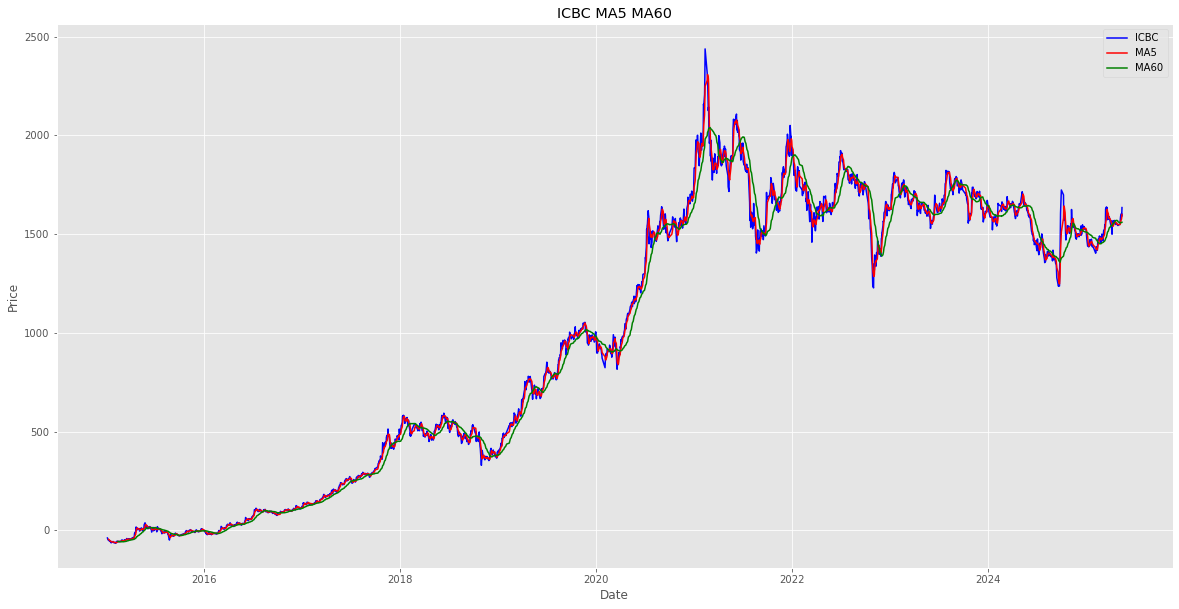

In [24]:
# 可视化
import matplotlib.pyplot as plt
plt.style.use("ggplot")                     # 设置绘图风格
plt.figure(figsize=(20, 10))                # 设置绘图区域大小
plt.plot(df.index, df["close"], label="ICBC", color="blue")     # 绘制收盘价曲线
plt.plot(df.index, MA5, label="MA5", color="red")               # 绘制5日均线曲线
plt.plot(df.index, MA30, label="MA60", color="green")           # 绘制60日均线曲线
plt.title("ICBC MA5 MA60")  # 设置标题
plt.xlabel("Date")          # 设置x轴标签
plt.ylabel("Price")         # 设置y轴标签
plt.legend()                # 显示图例
plt.show()                  # 显示图形


- 分析输出所有金叉日期和死叉日期
    - 股票分析技术中的金叉和死叉，可以简单解释为：
        - 分析指标中的两根线，一根为短时间内的指标线，另一根为较长时间的指标线。
        - 如果短时间的指标线方向拐头向上，并且穿过了较长时间的指标线，这种状态叫“金叉”；
        - 如果短时间的指标线方向拐头向下，并且穿过了较长时间的指标线，这种状态叫“死叉”；
        - 一般情况下，出现金叉后，操作趋向买入；死叉则趋向卖出。当然，金叉和死叉只是分析指标之一，要和其他很多指标配合使用，才能增加操作的准确性。

In [25]:
MA5 = MA5[30:]
MA30 = MA30[30:]
s1 = MA5 > MA30
s2 = MA5 < MA30
df = df[30:]


In [26]:
# 死叉
death_ex = s1 & s2.shift(1)
df.loc[death_ex]
death_date = df.loc[death_ex].index
death_date

DatetimeIndex(['2015-07-15', '2015-09-16', '2015-10-09', '2015-12-03',
               '2015-12-21', '2016-02-22', '2016-08-11', '2016-10-13',
               '2016-11-25', '2017-07-24', '2017-09-18', '2017-12-15',
               '2018-03-16', '2018-05-09', '2018-07-18', '2018-07-25',
               '2018-09-20', '2018-12-04', '2019-01-03', '2019-06-14',
               '2019-08-13', '2020-01-02', '2020-02-19', '2020-03-03',
               '2020-04-02', '2020-08-19', '2020-10-14', '2020-11-05',
               '2021-04-02', '2021-04-16', '2021-05-20', '2021-09-16',
               '2021-11-23', '2022-04-07', '2022-06-02', '2022-09-29',
               '2022-11-18', '2023-02-14', '2023-03-31', '2023-06-15',
               '2023-08-30', '2023-09-22', '2023-11-06', '2024-01-03',
               '2024-02-08', '2024-04-26', '2024-07-19', '2024-09-27',
               '2024-12-18', '2025-02-18', '2025-05-09'],
              dtype='datetime64[ns]', name='date', freq=None)

In [27]:
# 金叉
golden_ex = -(s1 | s2.shift(1))
df.loc[golden_ex]
golden_date = df.loc[golden_ex].index
golden_date

DatetimeIndex(['2015-06-17', '2015-07-17', '2015-09-28', '2015-11-26',
               '2015-12-10', '2016-01-05', '2016-08-05', '2016-08-18',
               '2016-11-21', '2017-07-06', '2017-09-08', '2017-11-29',
               '2018-02-05', '2018-03-27', '2018-06-28', '2018-07-23',
               '2018-07-31', '2018-10-15', '2018-12-25', '2019-05-10',
               '2019-07-22', '2019-11-28', '2020-01-03', '2020-02-28',
               '2020-03-18', '2020-08-10', '2020-09-21', '2020-10-27',
               '2021-03-01', '2021-04-15', '2021-05-06', '2021-06-22',
               '2021-11-04', '2022-01-06', '2022-05-13', '2022-07-21',
               '2022-10-10', '2023-02-08', '2023-02-23', '2023-04-12',
               '2023-08-21', '2023-09-11', '2023-09-26', '2023-12-05',
               '2024-01-05', '2024-04-09', '2024-05-24', '2024-07-25',
               '2024-11-18', '2025-01-03', '2025-04-08'],
              dtype='datetime64[ns]', name='date', freq=None)

In [28]:
# 简洁写法
# 金叉：短期均线(MA5)从下方穿过长期均线(MA30)
golden_cross = (MA5 > MA30) & (MA5.shift(1) < MA30.shift(1))
golden_cross_dates = df.loc[golden_cross].index

# 死叉：短期均线(MA5)从上方穿过长期均线(MA30)
death_cross = (MA5 < MA30) & (MA5.shift(1) > MA30.shift(1))
death_cross_dates = df.loc[death_cross].index

# 打印金叉和死叉的次数
print(f"金叉次数: {len(golden_cross_dates)}")
print(f"死叉次数: {len(death_cross_dates)}")

# # 可视化展示金叉和死叉点位
# plt.figure(figsize=(20, 10))
# plt.plot(df.index, df["close"], label="ICBC", color="blue", alpha=0.6)
# plt.plot(df.index, MA5, label="MA5", color="red")
# plt.plot(df.index, MA30, label="MA30", color="green")
# plt.scatter(golden_cross_dates, df.loc[golden_cross_dates, "close"], marker="^", color="red", s=100, label="金叉")
# plt.scatter(death_cross_dates, df.loc[death_cross_dates, "close"], marker="v", color="green", s=100, label="死叉")
# plt.title("ICBC 金叉与死叉分析")
# plt.xlabel("日期")
# plt.ylabel("价格")
# plt.legend()
# plt.show()

金叉次数: 51
死叉次数: 51


- 如果我从假如我从2017年1月1日开始，初始资金为100000元，金叉尽量买入，死叉全部卖出，则到今天为止，我的炒股收益率如何？
- 分析:
    - 买卖股票的单价使用开盘价
    - 买卖股票的时机
    - 最终手里会有剩余的股票没卖出去
        - 如果最后一天为金叉, 则买入股票。估量剩余股票的价值计算到总收益。
        - 剩余股票的单价就是最后一天的收盘价。

In [29]:
s1 = Series(data=1, index=golden_date)
s2 = Series(data=0, index=death_date)

s = s1.append(s2)
s = s.sort_index()
s

date
2015-06-17    1
2015-07-15    0
2015-07-17    1
2015-09-16    0
2015-09-28    1
             ..
2024-12-18    0
2025-01-03    1
2025-02-18    0
2025-04-08    1
2025-05-09    0
Length: 102, dtype: int64

In [30]:
s = s["2017":"2024"]

In [31]:
first_monry = 100000 # 初始资金
money = first_monry  # 当前资金
hold = 0             # 当前持有的股票数量(100股=1手)

for i in range(0, len(s)):
    if s[i] == 1:  # 金叉
        golden_time = s.index[i]
        p_golden = df.loc[golden_time]["open"]
        hold_count = money // (p_golden * 100)
        hold = hold_count * 100
        money -= (p_golden * hold)
        print(f"买入时间: {golden_time}, 买入价格: {p_golden}, 买入数量: {hold_count}手, 当前资金: {money}")
    else: # 死叉
        death_time = s.index[i]
        p_death = df.loc[death_time]["open"]
        money += (p_death * hold)
        print(f"卖出时间: {death_time}, 卖出价格: {p_death}, 卖出数量: {hold // 100}手, 当前资金: {money}")
        hold = 0

last_monry = hold * df["close"][-1]

# 计算总收益
money + last_monry - first_monry
# 计算收益率
profit = (money + last_monry - first_monry) / first_monry
profit

买入时间: 2017-07-06 00:00:00, 买入价格: 246.107, 买入数量: 4.0手, 当前资金: 1557.199999999997
卖出时间: 2017-07-24 00:00:00, 卖出价格: 269.664, 卖出数量: 4.0手, 当前资金: 109422.79999999999
买入时间: 2017-09-08 00:00:00, 买入价格: 273.034, 买入数量: 4.0手, 当前资金: 209.1999999999971
卖出时间: 2017-09-18 00:00:00, 卖出价格: 284.924, 卖出数量: 4.0手, 当前资金: 114178.79999999999
买入时间: 2017-11-29 00:00:00, 买入价格: 444.724, 买入数量: 2.0手, 当前资金: 25233.999999999985
卖出时间: 2017-12-15 00:00:00, 卖出价格: 458.784, 卖出数量: 2.0手, 当前资金: 116990.79999999999
买入时间: 2018-02-05 00:00:00, 买入价格: 522.004, 买入数量: 2.0手, 当前资金: 12589.999999999985
卖出时间: 2018-03-16 00:00:00, 卖出价格: 542.384, 卖出数量: 2.0手, 当前资金: 121066.79999999999
买入时间: 2018-03-27 00:00:00, 买入价格: 517.784, 买入数量: 2.0手, 当前资金: 17509.999999999985
卖出时间: 2018-05-09 00:00:00, 卖出价格: 503.864, 卖出数量: 2.0手, 当前资金: 118282.79999999997
买入时间: 2018-06-28 00:00:00, 买入价格: 519.783, 买入数量: 2.0手, 当前资金: 14326.199999999968
卖出时间: 2018-07-18 00:00:00, 卖出价格: 548.213, 卖出数量: 2.0手, 当前资金: 123968.79999999996
买入时间: 2018-07-23 00:00:00, 买入价格: 541.783, 买入数量: 2.0手, 

0.2181179999999996